# **Real-Time Retail Data Simulation with PostgreSQL**
This notebook simulates a live data stream of retail transactions, inserts them into a PostgreSQL database in real time, and visualizes product-level revenue as it updates.

In [16]:
!pip install sqlalchemy

from sqlalchemy import create_engine
import getpass
import time
import random
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

### **Step 1: Connect to the PostgreSQL Database**

In [17]:
# Prompt for secure password entry
password = getpass.getpass("Enter your DB password: ")

# Define your PostgreSQL RDS connection parameters
host = input("Enter your DB host: ")
port = '5432'
database = 'postgres'
username = 'postgres'

# Construct connection string
connection_string = f'postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}'

# Create SQLAlchemy engine
engine = create_engine(connection_string)

Enter your DB password: ··········


### **Step 2: Simulate and Insert Real-Time Retail Transactions**

In [18]:
# Sample products and prices
products = ['Shirt', 'Shoes', 'Backpack', 'Hat', 'Jacket']
prices = [19.99, 29.99, 49.99, 59.99]

# Simulate and insert 20 transactions
for _ in range(20):
    customer_id = random.randint(1000, 9999)
    product = random.choice(products)
    quantity = random.randint(1, 5)
    price_per_unit = random.choice(prices)
    total_price = quantity * price_per_unit
    timestamp = datetime.now()

    # Create single-row DataFrame
    df = pd.DataFrame([{
        'timestamp': timestamp,
        'customer_id': customer_id,
        'product': product,
        'quantity': quantity,
        'price_per_unit': price_per_unit,
        'total_price': total_price
    }])

    # Insert into database
    df.to_sql('retail_stream', engine, if_exists='append', index=False)
    print(f"Inserted: {df.iloc[0].to_dict()}")

    time.sleep(2)  # Wait 2 seconds between transactions

Inserted: {'timestamp': Timestamp('2025-05-26 01:52:30.569888'), 'customer_id': 4354, 'product': 'Hat', 'quantity': 3, 'price_per_unit': 49.99, 'total_price': 149.97}
Inserted: {'timestamp': Timestamp('2025-05-26 01:52:33.072384'), 'customer_id': 3322, 'product': 'Jacket', 'quantity': 1, 'price_per_unit': 59.99, 'total_price': 59.99}
Inserted: {'timestamp': Timestamp('2025-05-26 01:52:35.169141'), 'customer_id': 6335, 'product': 'Shoes', 'quantity': 5, 'price_per_unit': 49.99, 'total_price': 249.95000000000002}
Inserted: {'timestamp': Timestamp('2025-05-26 01:52:37.555097'), 'customer_id': 8545, 'product': 'Hat', 'quantity': 4, 'price_per_unit': 29.99, 'total_price': 119.96}
Inserted: {'timestamp': Timestamp('2025-05-26 01:52:39.653027'), 'customer_id': 7984, 'product': 'Jacket', 'quantity': 5, 'price_per_unit': 49.99, 'total_price': 249.95000000000002}
Inserted: {'timestamp': Timestamp('2025-05-26 01:52:41.741841'), 'customer_id': 4231, 'product': 'Shirt', 'quantity': 5, 'price_per_un

**This output shows that the code successfully simulated and inserted 20 retail transactions into your PostgreSQL database table named retail_stream.**

Each Inserted: line shows one transaction that includes:
- 'timestamp': The exact time the transaction was simulated
- 'customer_id': A randomly generated ID (1000–9999)
- 'product': One of the products (e.g. Hat, Shirt, Jacket, Backpack)
- 'quantity': Number of units purchased (random between 1–5)
- 'price_per_unit': The price of a single item (random from your list)
- 'total_price': quantity × price_per_unit (calculated)

These records were also written to the PostgreSQL database — one every 2 seconds.

### **3. Read the `retail_stream` table into a DataFrame**

This will help bring the live data from your PostgreSQL database into Python for further analysis, visualization, or verification.

In [19]:
df_stream = pd.read_sql('SELECT * FROM retail_stream', engine)
df_stream.head()

,timestamp,customer_id,product,quantity,price_per_unit,total_price
0,2025-05-26 01:30:38.704005,5325,Hat,4,49.99,199.96
1,2025-05-26 01:30:41.259934,4859,Hat,2,19.99,39.98
2,2025-05-26 01:30:43.345997,1119,Hat,4,49.99,199.96
3,2025-05-26 01:30:45.431255,5065,Shirt,5,19.99,99.95
4,2025-05-26 01:30:47.516777,1799,Shirt,2,19.99,39.98


### **4. Add time-based columns to support analysis**

In [20]:
df_stream['timestamp'] = pd.to_datetime(df_stream['timestamp'])
df_stream['Hour'] = df_stream['timestamp'].dt.hour
df_stream['Minute'] = df_stream['timestamp'].dt.minute
df_stream['Day'] = df_stream['timestamp'].dt.date

### **5. Visualize key insights**

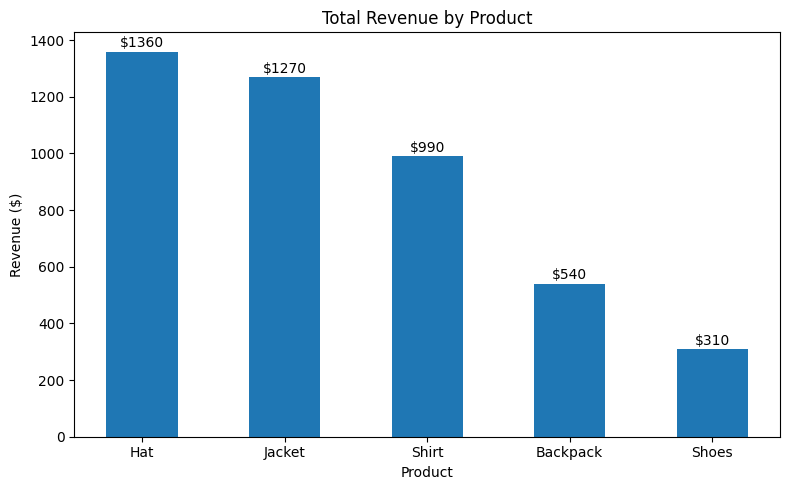

In [21]:
product_sales = df_stream.groupby('product')['total_price'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
bars = plt.bar(product_sales.index, product_sales.values, width=0.5)

plt.title("Total Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue ($)")

# Add dollar signs on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f'${yval:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()